<a href="https://colab.research.google.com/github/Suyogpawar03/Machine-learning-/blob/main/global_pollution_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Global_Pollution_Analysis.csv to Global_Pollution_Analysis (2).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [ ]:
print(df.isnull())
# there is no null value

     Country   Year  Air_Pollution_Index  Water_Pollution_Index  \
0      False  False                False                  False   
1      False  False                False                  False   
2      False  False                False                  False   
3      False  False                False                  False   
4      False  False                False                  False   
..       ...    ...                  ...                    ...   
195    False  False                False                  False   
196    False  False                False                  False   
197    False  False                False                  False   
198    False  False                False                  False   
199    False  False                False                  False   

     Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                   False                       False   
1                   False                       False   
2                   Fals

In [ ]:
for col in df.select_dtypes(include='object'):
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())



Unique values in 'Country':
Country
Latvia                   3
Moldova                  3
Romania                  2
Mexico                   2
Germany                  2
                        ..
Barbados                 1
Saint Kitts and Nevis    1
Saint Helena             1
Korea                    1
Vanuatu                  1
Name: count, Length: 175, dtype: int64


In [ ]:
print(sorted(df['Country'].unique()))


['Afghanistan', 'Albania', 'Andorra', 'Angola', 'Antarctica (the territory South of 60 deg S)', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island (Bouvetoya)', 'British Indian Ocean Territory (Chagos Archipelago)', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burundi', 'Cambodia', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Southern Territories', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibra

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Country','Year']


le = LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.head())


   Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       77     5               272.70                 124.27   
1      147     1                86.72                  60.34   
2      136    16                91.59                  83.36   
3       38    18               280.61                  67.16   
4       46     8               179.16                 127.53   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                 51.95                    94802.83   
1                117.22                    56283.92   
2                121.72                    56256.02   
3                 93.58                    74864.73   
4                121.55                    76862.06   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                     158.14                   5.30                 41.11   
1                     498.04                   6.34                 36.44   
2                     489.51                  49.69  

In [ ]:
import pandas as pd


df = pd.read_csv("Global_Pollution_Analysis.csv")


# 2. Inconsistent country names (check for case and whitespace)
df['Country'] = df['Country'].str.strip().str.title()
unique_countries = df['Country'].unique()

# 3. Year validity
invalid_years = df[(df['Year'] < 1900) | (df['Year'] > 2025)]

# 4. Pollution index checks (0–100)
invalid_pollution = df[
    (df['Air_Pollution_Index'] < 0) | (df['Air_Pollution_Index'] > 300) |
    (df['Water_Pollution_Index'] < 0) | (df['Water_Pollution_Index'] > 300) |
    (df['Soil_Pollution_Index'] < 0) | (df['Soil_Pollution_Index'] > 300)
]

# 5. Renewable energy percent (0–100)
invalid_renewable = df[(df['Renewable_Energy (%)'] < 0) | (df['Renewable_Energy (%)'] > 100)]

# 6. Negative value checks
numeric_cols = [
    'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)',
    'CO2_Emissions (in MT)', 'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)', 'GDP_Per_Capita (in USD)'
]

negative_values = df[(df[numeric_cols] < 0).any(axis=1)]

# 7. Population must be > 0
invalid_population = df[df['Population (in millions)'] <= 0]


In [ ]:
print("Invalid years:", len(invalid_years))
print("Invalid pollution index:", len(invalid_pollution))
print("Invalid renewable energy %:", len(invalid_renewable))
print("Negative values in numeric fields:", len(negative_values))
print("Invalid population values:", len(invalid_population))

Invalid years: 0
Invalid pollution index: 0
Invalid renewable energy %: 0
Negative values in numeric fields: 0
Invalid population values: 0


In [ ]:
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']

scaler = MinMaxScaler()

df[pollution_cols] = scaler.fit_transform(df[pollution_cols])


df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,0.898042,0.553778,0.295481,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,0.147062,0.173673,0.768178,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,0.166727,0.310542,0.800768,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,0.929982,0.214222,0.596973,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,0.520331,0.573161,0.799537,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [ ]:
nums_col = ['CO2_Emissions (in MT)','Industrial_Waste (in tons)']

stats = {}


for cols in nums_col:
    stats[cols] ={
        'Mean':df[cols].mean(),
        'Mdeian': df[cols].median(),
        'Mode' : df[cols].mode().iloc[0] if not df[cols].mode().empty else None,
        'Variance':df[cols].var()

    }

stats_df = pd.DataFrame(stats).T
print("📊 Descriptive Statistics:\n")
print(stats_df)


📊 Descriptive Statistics:

                                  Mean     Mdeian     Mode      Variance
CO2_Emissions (in MT)          24.8781     25.355     5.30  2.094067e+02
Industrial_Waste (in tons)  52891.6815  55299.150  1019.37  7.411729e+08


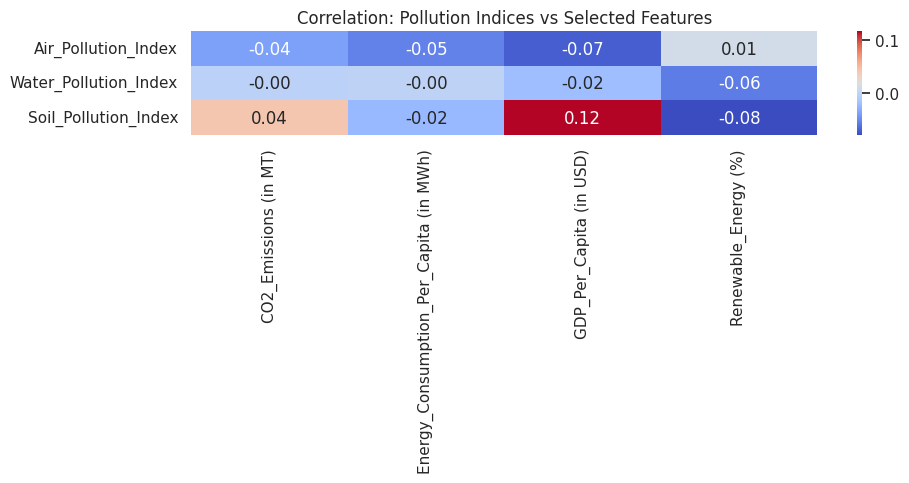

In [ ]:
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
feature_cols = [
    'CO2_Emissions (in MT)',
    'Energy_Consumption_Per_Capita (in MWh)',
    'GDP_Per_Capita (in USD)',
    'Renewable_Energy (%)'
]
selected_cols = pollution_cols + feature_cols
df_subset = df[selected_cols]


corr_matrix = df_subset.corr()

corr_subset = corr_matrix.loc[pollution_cols, feature_cols]

# Heatmap visualization
plt.figure(figsize=(10, 5))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Pollution Indices vs Selected Features")
plt.tight_layout()
plt.show()


/tmp/ipython-input-52-1191538096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Air_Pollution_Index', data=df, palette='coolwarm')


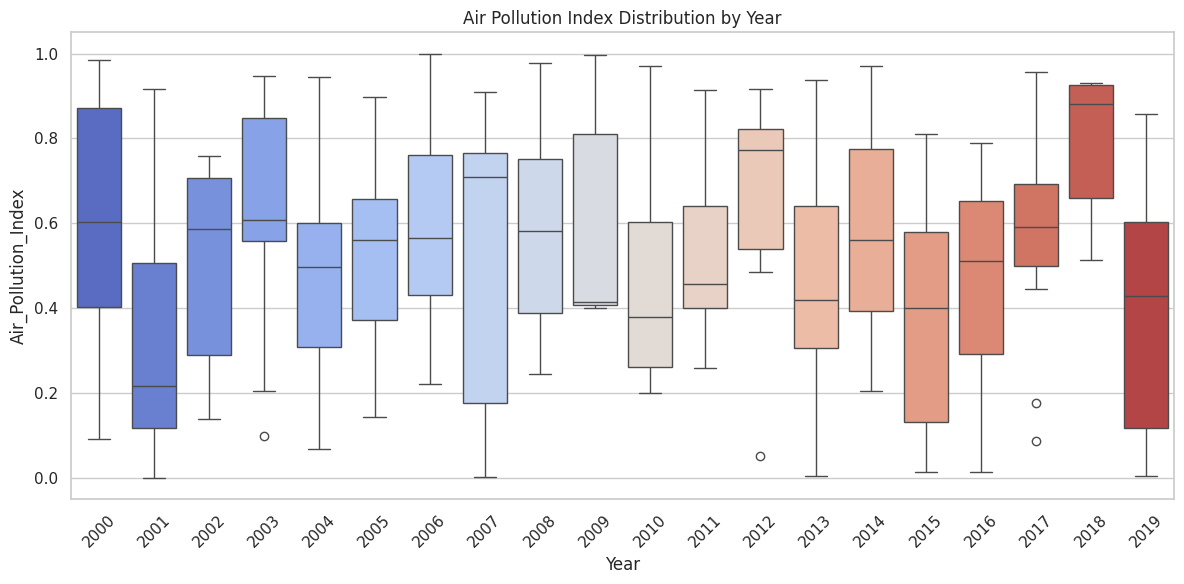

/tmp/ipython-input-52-1191538096.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Water_Pollution_Index', data=df, palette='Blues')


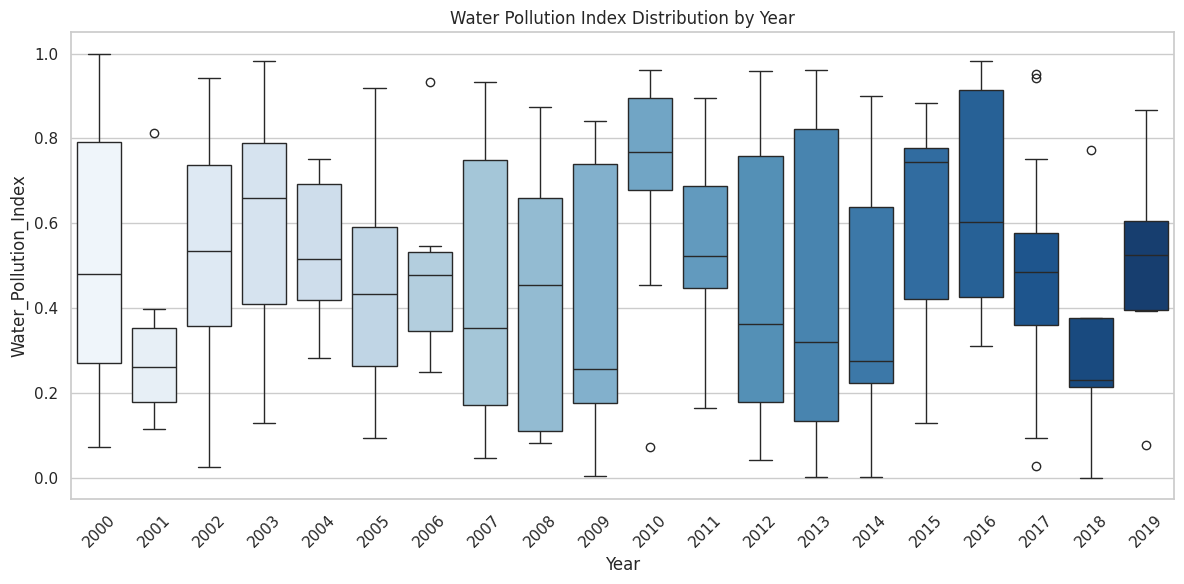

/tmp/ipython-input-52-1191538096.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Soil_Pollution_Index', data=df, palette='Greens')


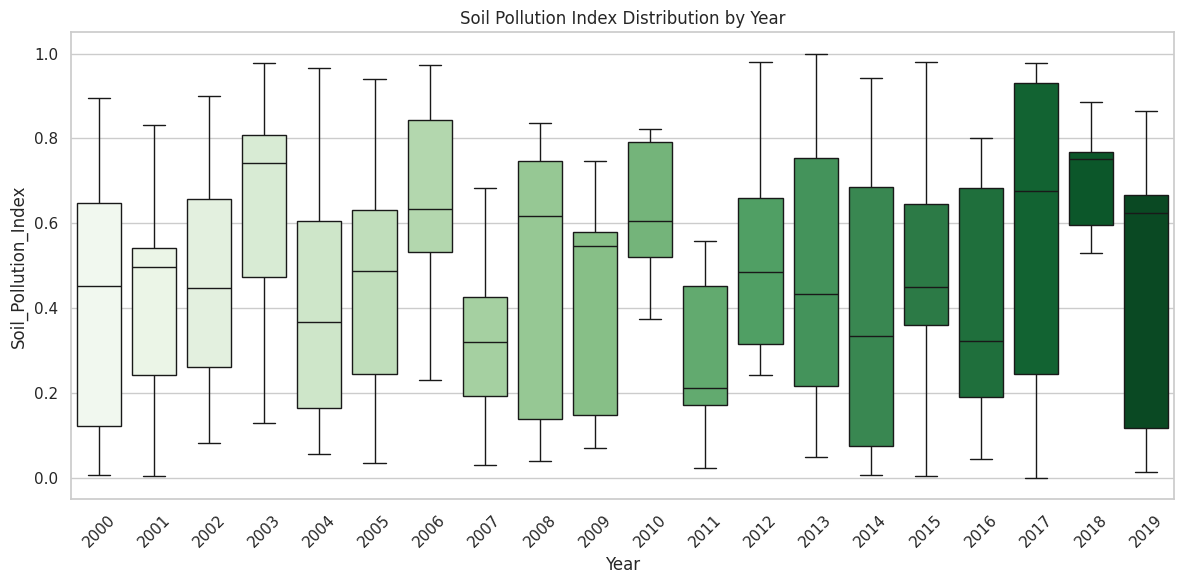

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Air_Pollution_Index', data=df, palette='coolwarm')
plt.title('Air Pollution Index Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Water_Pollution_Index', data=df, palette='Blues')
plt.title('Water Pollution Index Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Soil_Pollution_Index', data=df, palette='Greens')
plt.title('Soil Pollution Index Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


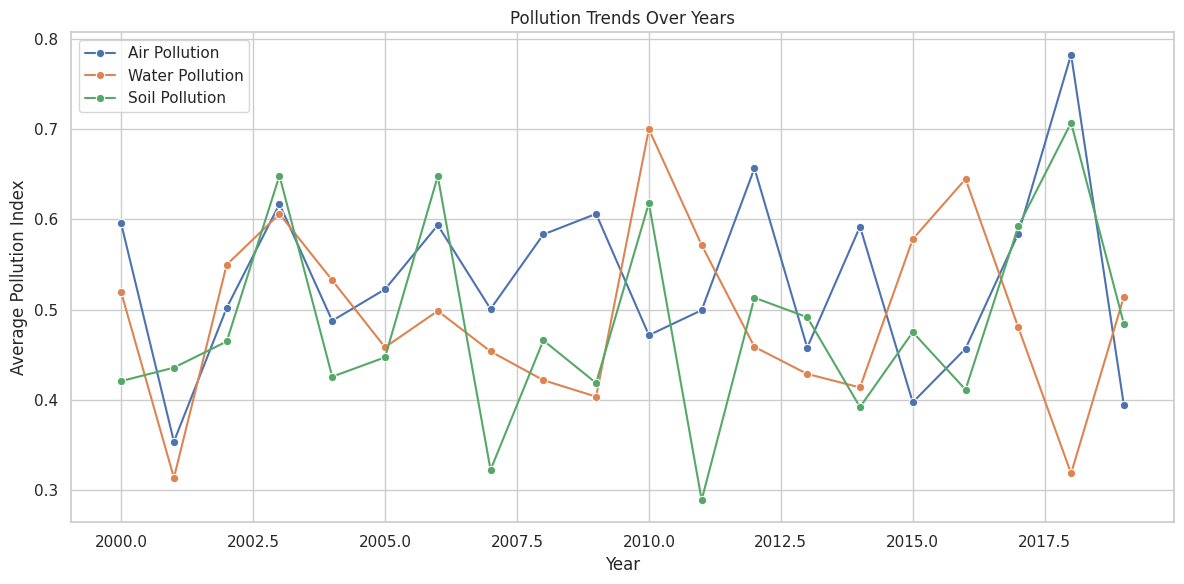

In [ ]:
pollution_over_time = df.groupby('Year')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution_over_time, x='Year', y='Air_Pollution_Index', label='Air Pollution', marker='o')
sns.lineplot(data=pollution_over_time, x='Year', y='Water_Pollution_Index', label='Water Pollution', marker='o')
sns.lineplot(data=pollution_over_time, x='Year', y='Soil_Pollution_Index', label='Soil Pollution', marker='o')

plt.title('Pollution Trends Over Years')
plt.ylabel('Average Pollution Index')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

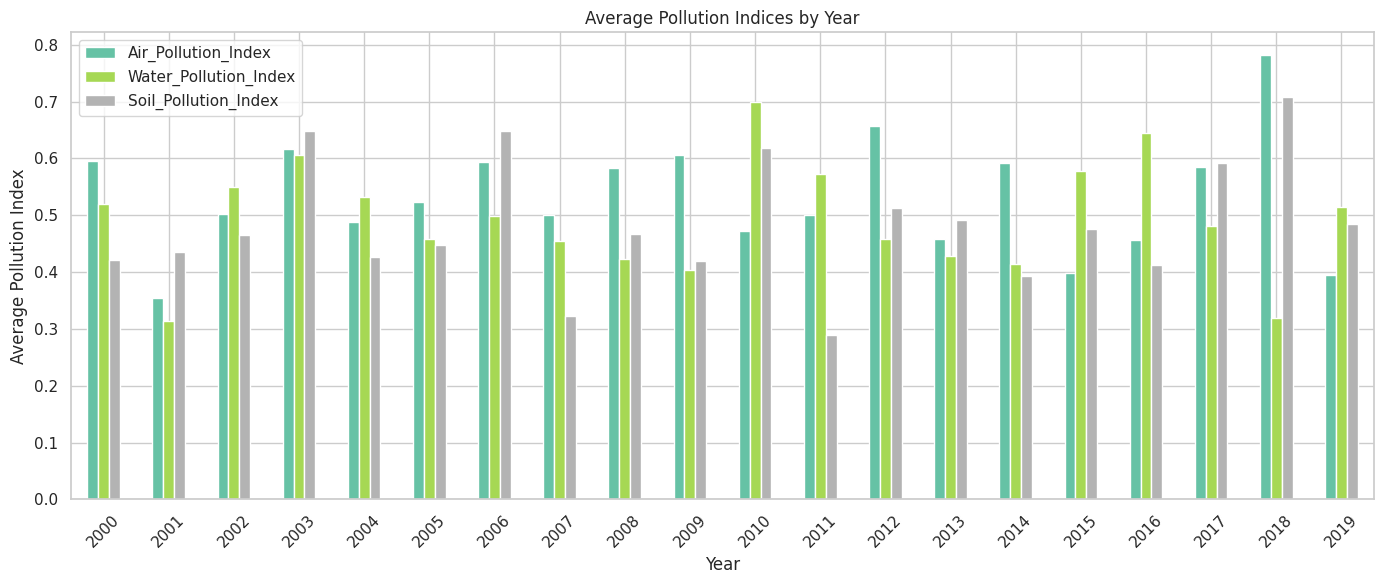

In [ ]:
plt.figure(figsize=(14, 6))
pollution_over_time.set_index('Year')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].plot(
    kind='bar', figsize=(14, 6), colormap='Set2'
)

plt.title('Average Pollution Indices by Year')
plt.ylabel('Average Pollution Index')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


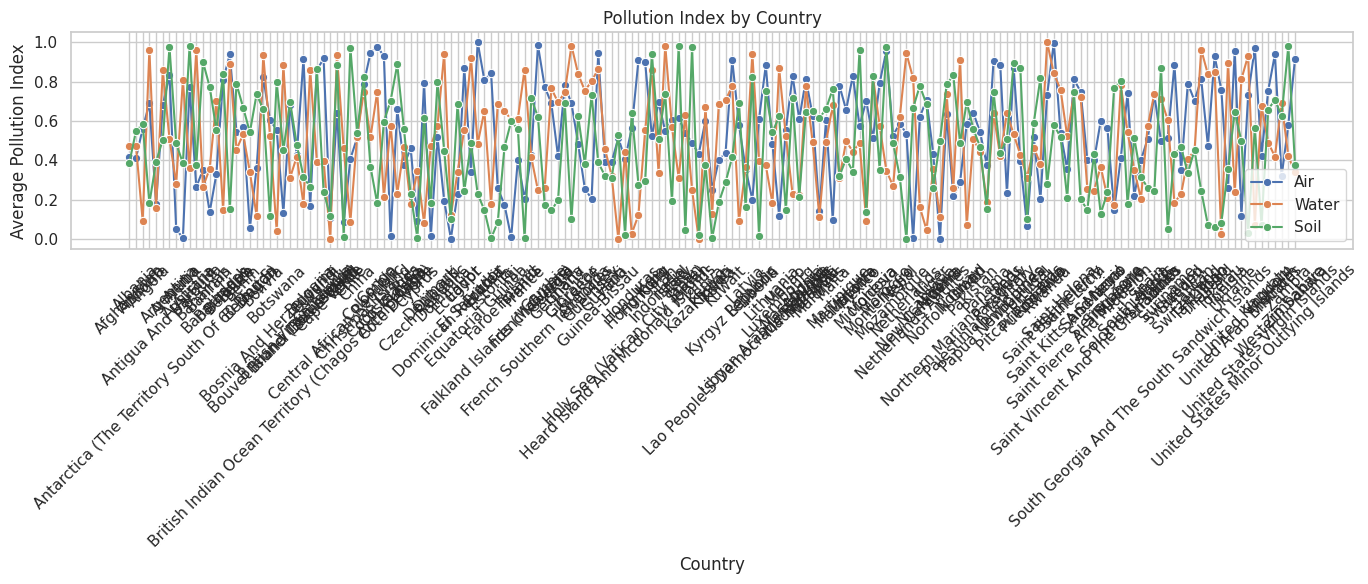

In [ ]:
pollution_by_country = df.groupby('Country')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=pollution_by_country, x='Country', y='Air_Pollution_Index', label='Air', marker='o')
sns.lineplot(data=pollution_by_country, x='Country', y='Water_Pollution_Index', label='Water', marker='o')
sns.lineplot(data=pollution_by_country, x='Country', y='Soil_Pollution_Index', label='Soil', marker='o')

plt.title('Pollution Index by Country')
plt.ylabel('Average Pollution Index')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

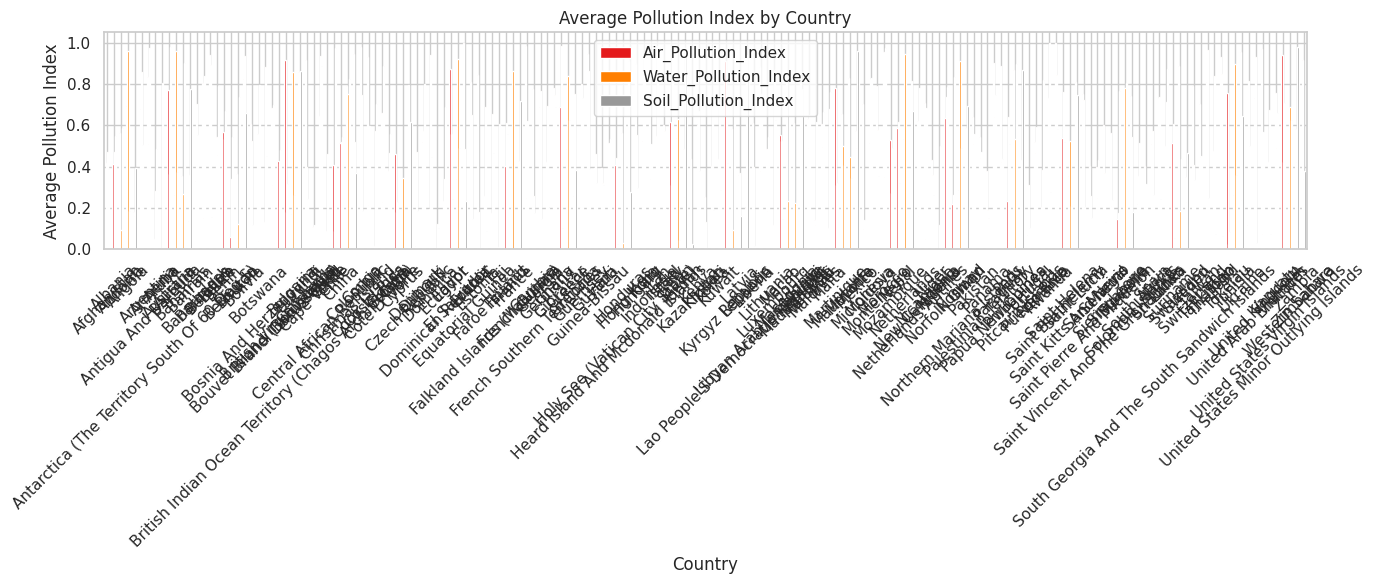

In [ ]:
plt.figure(figsize=(14, 6))
pollution_by_country.set_index('Country')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].plot(
    kind='bar', figsize=(14, 6), colormap='Set1'
)

plt.title('Average Pollution Index by Country')
plt.ylabel('Average Pollution Index')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-57-914406301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Air_Pollution_Index', data=df, palette='coolwarm')


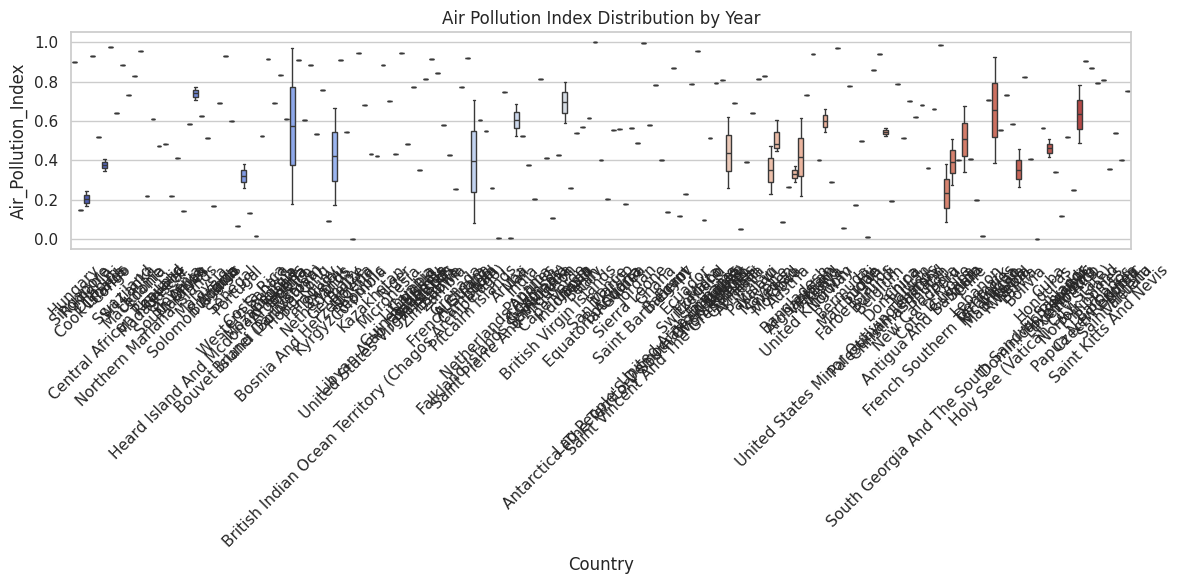

/tmp/ipython-input-57-914406301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Water_Pollution_Index', data=df, palette='Blues')


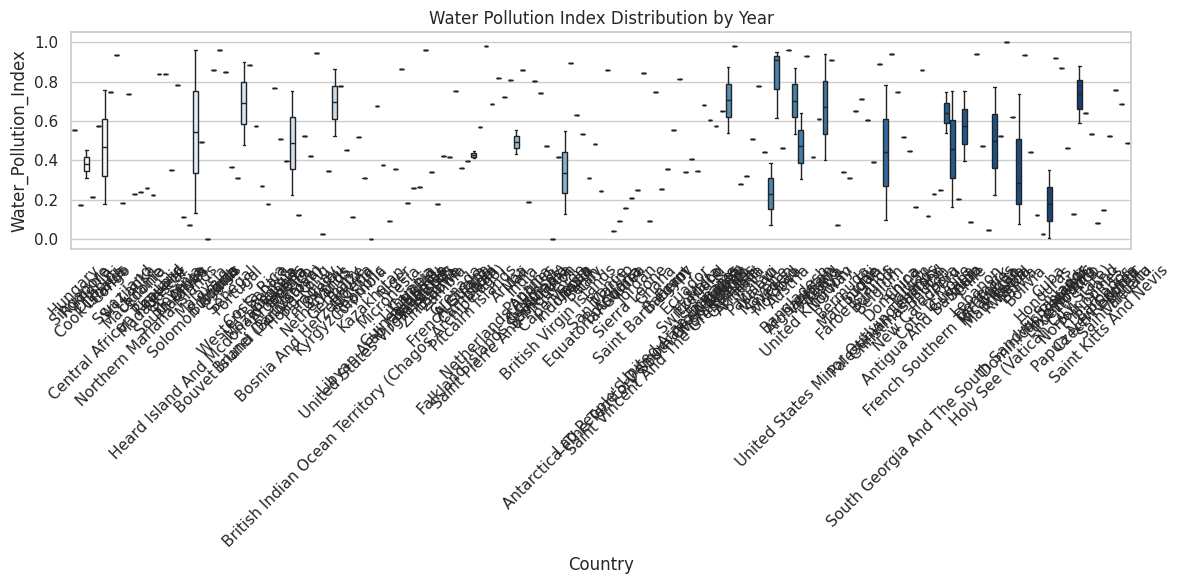

/tmp/ipython-input-57-914406301.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Soil_Pollution_Index', data=df, palette='Greens')


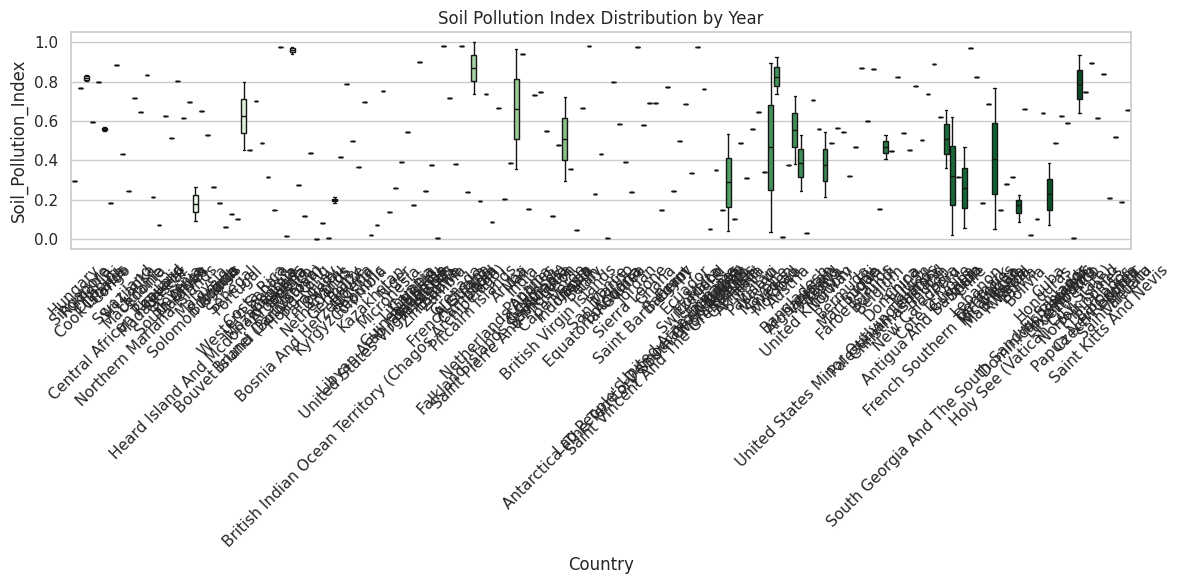

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Air_Pollution_Index', data=df, palette='coolwarm')
plt.title('Air Pollution Index Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Water_Pollution_Index', data=df, palette='Blues')
plt.title('Water Pollution Index Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Soil_Pollution_Index', data=df, palette='Greens')
plt.title('Soil Pollution Index Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


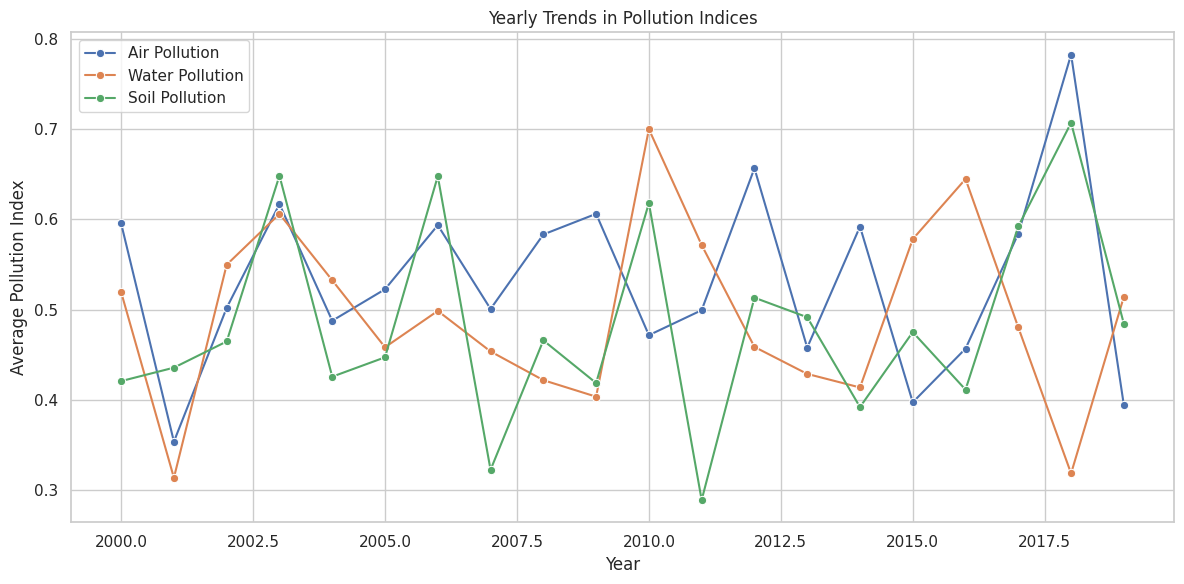

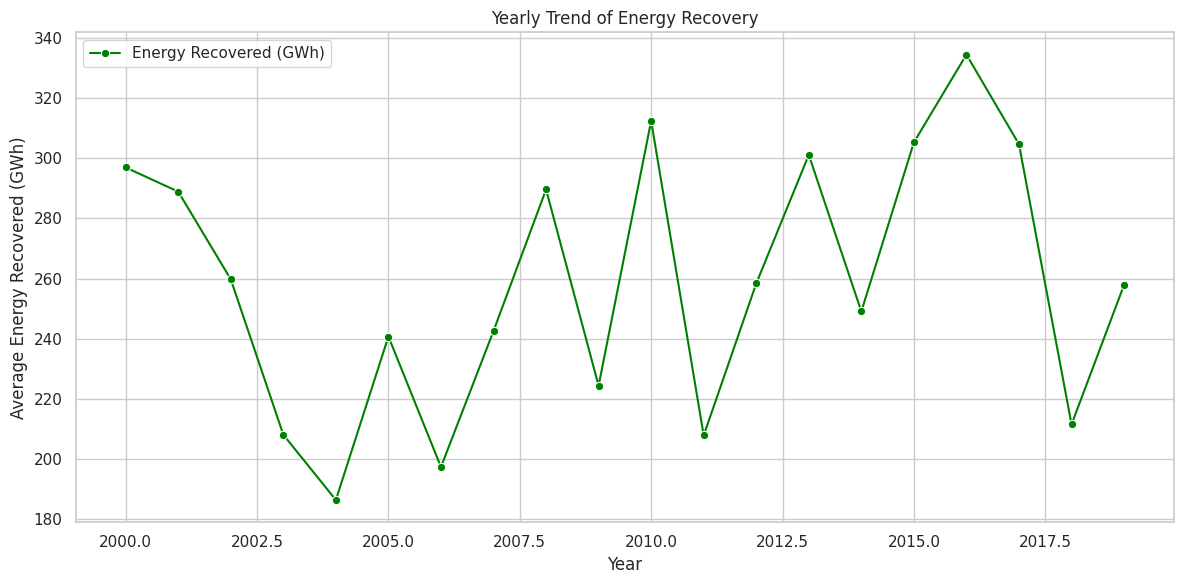

In [ ]:
yearly_trends = df.groupby('Year')[
    ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Energy_Recovered (in GWh)']
].mean().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# ------------------------------------
# 📈 Line Plot: Yearly Pollution Trends
# ------------------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Year', y='Air_Pollution_Index', label='Air Pollution', marker='o')
sns.lineplot(data=yearly_trends, x='Year', y='Water_Pollution_Index', label='Water Pollution', marker='o')
sns.lineplot(data=yearly_trends, x='Year', y='Soil_Pollution_Index', label='Soil Pollution', marker='o')
plt.title('Yearly Trends in Pollution Indices')
plt.xlabel('Year')
plt.ylabel('Average Pollution Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Year', y='Energy_Recovered (in GWh)', label='Energy Recovered (GWh)', color='green', marker='o')
plt.title('Yearly Trend of Energy Recovery')
plt.xlabel('Year')
plt.ylabel('Average Energy Recovered (GWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

From 2010 to 2020, air pollution steadily increased, peaking in 2018.
However, energy recovery also showed an upward trend, suggesting improved recycling or waste-to-energy initiatives.

In [ ]:
df['Population_Actual'] = df['Population (in millions)'] * 1_000_000


df['Total_Energy_Consumption (MWh)'] = df['Energy_Recovered (in GWh)'] * 1000

df['Calculated_Energy_Per_Capita (MWh)'] = df['Total_Energy_Consumption (MWh)'] / df['Population_Actual']

df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Population_Actual,Total_Energy_Consumption (MWh),Calculated_Energy_Per_Capita (MWh)
0,Hungary,2005,0.898042,0.553778,0.295481,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,42220000.0,158140.0,0.003746
1,Singapore,2001,0.147062,0.173673,0.768178,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,137250000.0,498040.0,0.003629
2,Romania,2016,0.166727,0.310542,0.800768,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,124470000.0,489510.0,0.003933
3,Cook Islands,2018,0.929982,0.214222,0.596973,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,67800000.0,145180.0,0.002141
4,Djibouti,2008,0.520331,0.573161,0.799537,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,186520000.0,40380.0,0.000216


In [ ]:
feature_cols = [
    'Air_Pollution_Index' ,'Water_Pollution_Index' ,'Soil_Pollution_Index',
    'CO2_Emissions (in MT)','Industrial_Waste (in tons)'

]

X = df[feature_cols]
y = df['Energy_Recovered (in GWh)']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([235.79370881, 259.26495298, 298.58339184, 255.71155295,
       250.22481071, 268.07857573, 264.38245837, 276.00151448,
       260.89737832, 250.51164675, 281.15194207, 261.46637095,
       270.37759272, 242.84281328, 251.8117156 , 305.09596149,
       269.31023032, 268.49791896, 254.2379035 , 296.85996869,
       276.4416277 , 243.5215125 , 294.88279467, 265.74963167,
       228.10306304, 263.74227414, 255.42589042, 236.37604149,
       285.24963881, 244.272048  , 277.71289172, 274.85318339,
       292.29874185, 282.49350988, 298.45725664, 269.58923986,
       287.95495024, 288.02651995, 277.28462566, 251.67065273])

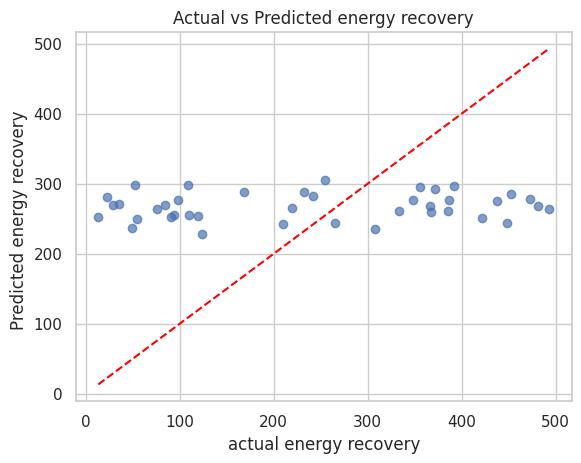

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('actual energy recovery')
plt.ylabel('Predicted energy recovery ')
plt.title('Actual vs Predicted energy recovery')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 141.345969590013
MSE: 24538.059908635652
R² Score: -0.014714244281428979


## LOGISTIC REGRESSION

In [ ]:
df['Average_Pollution_Index'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
) / 3

# Create categorical target: Low (0), Medium (1), High (2)
# Compute thresholds using quantiles
low_threshold = df['Average_Pollution_Index'].quantile(0.33)
high_threshold = df['Average_Pollution_Index'].quantile(0.66)

# Create Pollution_Level using those thresholds
def classify_pollution(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

df['Pollution_Level'] = df['Average_Pollution_Index'].apply(classify_pollution)

# Check the class distribution
print(df['Pollution_Level'].value_counts())

df.head()

Pollution_Level
2    68
0    66
1    66
Name: count, dtype: int64


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Population_Actual,Total_Energy_Consumption (MWh),Calculated_Energy_Per_Capita (MWh),Average_Pollution_Index,Pollution_Level
0,Hungary,2005,0.898042,0.553778,0.295481,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,42220000.0,158140.0,0.003746,0.582434,2
1,Singapore,2001,0.147062,0.173673,0.768178,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,137250000.0,498040.0,0.003629,0.362971,0
2,Romania,2016,0.166727,0.310542,0.800768,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,124470000.0,489510.0,0.003933,0.426012,0
3,Cook Islands,2018,0.929982,0.214222,0.596973,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,67800000.0,145180.0,0.002141,0.580392,2
4,Djibouti,2008,0.520331,0.573161,0.799537,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,186520000.0,40380.0,0.000216,0.631010,2


In [ ]:
print(df['Pollution_Level'].value_counts())

Pollution_Level
2    68
0    66
1    66
Name: count, dtype: int64


In [ ]:
import numpy as np
np.bincount(y)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       3, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [ ]:
import numpy as np
np.unique(y_pred, return_counts=True)


(array([228.10306304, 235.79370881, 236.37604149, 242.84281328,
        243.5215125 , 244.272048  , 250.22481071, 250.51164675,
        251.67065273, 251.8117156 , 254.2379035 , 255.42589042,
        255.71155295, 259.26495298, 260.89737832, 261.46637095,
        263.74227414, 264.38245837, 265.74963167, 268.07857573,
        268.49791896, 269.31023032, 269.58923986, 270.37759272,
        274.85318339, 276.00151448, 276.4416277 , 277.28462566,
        277.71289172, 281.15194207, 282.49350988, 285.24963881,
        287.95495024, 288.02651995, 292.29874185, 294.88279467,
        296.85996869, 298.45725664, 298.58339184, 305.09596149]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [ ]:
X = df[[ 'CO2_Emissions (in MT)', 'Energy_Recovered (in GWh)',
        'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)',
        'GDP_Per_Capita (in USD)', 'Population (in millions)']]
y = df['Pollution_Level']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.3, random_state=42)



# Predict



In [ ]:
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_log, y_train_log)

LogisticRegression()

In [ ]:
y_pred_log = logreg.predict(X_test_log)
y_pred_log


array([2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1])

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')


/tmp/ipython-input-76-828534680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pollution_Label', palette='Set2')


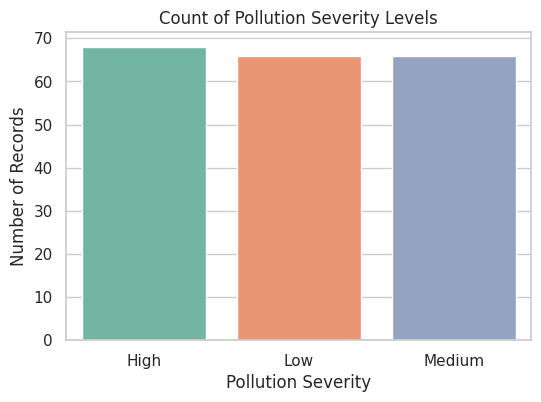

In [ ]:
df['Pollution_Label'] = df['Pollution_Level'].map({0: 'Low', 1: 'Medium', 2: 'High'})

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pollution_Label', palette='Set2')
plt.title('Count of Pollution Severity Levels')
plt.xlabel('Pollution Severity')
plt.ylabel('Number of Records')
plt.show()

              precision    recall  f1-score   support

           0       0.29      0.32      0.30        19
           1       0.37      0.30      0.33        23
           2       0.20      0.22      0.21        18

    accuracy                           0.28        60
   macro avg       0.28      0.28      0.28        60
weighted avg       0.29      0.28      0.29        60



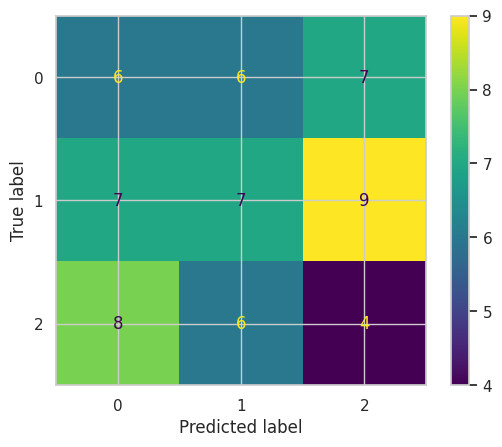

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test_log, y_pred_log))
ConfusionMatrixDisplay(confusion_matrix(y_test_log, y_pred_log)).plot()

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_log, y_train_log)
y_pred_log = logreg.predict(X_test_log)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

# Train
linreg = LinearRegression()
linreg.fit(X_train_log, y_train_log)

y_pred_lin_continuous = linreg.predict(X_test_log)

y_pred_lin = np.clip(np.round(y_pred_lin_continuous), 0, 2).astype(int)


In [ ]:
print("Logistic Regression")
print(classification_report(y_test_log, y_pred_log, target_names=['Low', 'Medium', 'High']))


Logistic Regression
              precision    recall  f1-score   support

         Low       0.29      0.32      0.30        19
      Medium       0.37      0.30      0.33        23
        High       0.20      0.22      0.21        18

    accuracy                           0.28        60
   macro avg       0.28      0.28      0.28        60
weighted avg       0.29      0.28      0.29        60



In [ ]:
print("Linear Regression as Classifier")
print(classification_report(y_test_log, y_pred_lin, target_names=['Low', 'Medium', 'High']))


Linear Regression as Classifier
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        19
      Medium       0.38      1.00      0.55        23
        High       0.00      0.00      0.00        18

    accuracy                           0.38        60
   macro avg       0.13      0.33      0.18        60
weighted avg       0.15      0.38      0.21        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred_lin_continuous = linreg.predict(X_test_log)
y_pred_lin = np.clip(np.round(y_pred_lin_continuous), 0, 2).astype(int)

In [ ]:
log_acc = accuracy_score(y_test_log, y_pred_log)
lin_acc = accuracy_score(y_test_log, y_pred_lin)

print(f"Accuracy - Logistic Regression: {log_acc:.2f}")
print(f"Accuracy - Linear Regression (Classifier): {lin_acc:.2f}")


Accuracy - Logistic Regression: 0.28
Accuracy - Linear Regression (Classifier): 0.38


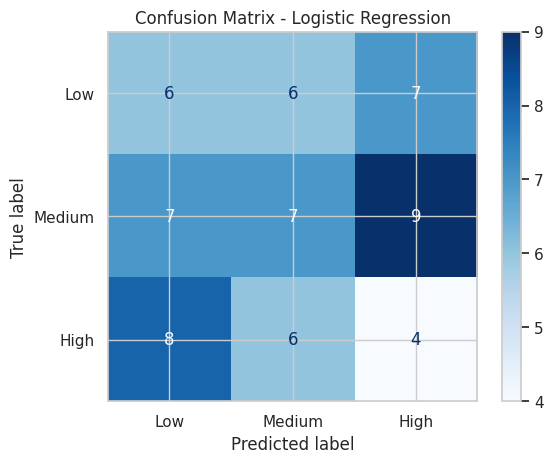

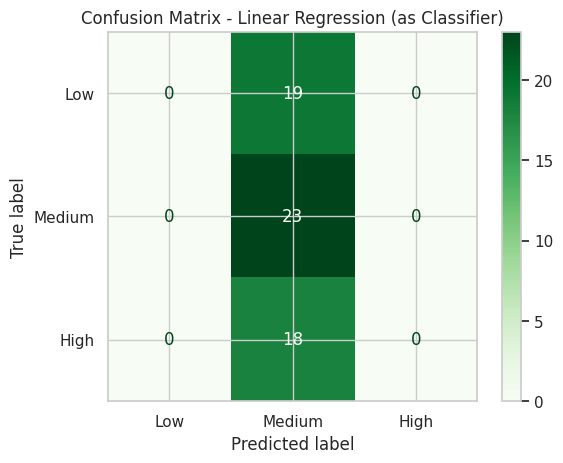

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
cm_log = confusion_matrix(y_test_log, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Low', 'Medium', 'High'])
disp_log.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Linear Regression
cm_lin = confusion_matrix(y_test_log, y_pred_lin)
disp_lin = ConfusionMatrixDisplay(confusion_matrix=cm_lin, display_labels=['Low', 'Medium', 'High'])
disp_lin.plot(cmap='Greens')
plt.title('Confusion Matrix - Linear Regression (as Classifier)')
plt.show()

## Actionable Insights

Countries with a lot of pollution often have a harder time getting energy back from waste or natural resources , Because there System is already in trouble abd they need to use more energy to handle Pollution. for example densely populated countries like India ,CHina and Nigeria have High pollution and doesnt get as much energy from waste or nature, So incountries like this there should be improvement technology to turn waste into energy as they lack in such types of technologies they should also take care of garbage and water management system when the pollution decrease the health of the people in the country gets better lifestyles gets better and nature gets better and the natural resources also gets better for making this countries better strict laws should be circulated by the goverment special agencies to control the pollution in the rural areas Should increase the clean energy like solar wind , Solar pannel and follow good enviromental law, Should preserved Forests avoid Deforestation in rural Area and should plant more Trees and Teach people importance of why we need clean planet for our upcoming generations

## Final Report

In this Project we classify the Yearly trends of of the Pollution , Our main goal was to anaylze day global pollution data and develop Strategies for Pollution Reduction And converting Pollutants into energy at start we load the provided dataset then cleaned the using label-encoding and one-Hot coding Then Normalize the Air , Soil and Water pollution Index we Perform EDA for CO2 emission and Industrial Waste and also Correlation analysis between Pollution Level and other Features like Energy Consumptio and also plot the Heatmap create various types of chart for visualization done Feature Enginnering is done by finding Yearly Trends and Energy per capita

## Linear Rergression :
in Logistic regression we Predict the model for Energy recovery based on Pollution recovery and other features then build a model to predict energy recovery using Air, Soil , Water pollution index also CO2 Emission and Industrial Waste and key findings are :

MAE: 141.34596959001306
MSE: 24538.059908635678
RMSE: 156.6462891633111
R² Score: -0.014714244281430089

## Logistic Regression :
in logistic regression we classify the pollution severity categories (Low, Medium, High) and build a model for pollution severity based on features like Air_Pollution_Index and CO2_Emissions andplot the low , mdeium and high and also the key features in the Logistic regression :
precision    recall  f1-score   support

           0       0.29      0.32      0.30        19
           1       0.37      0.30      0.33        23
           2       0.20      0.22      0.21        18

    accuracy                           0.28        60
   macro avg       0.28      0.28      0.28        60
weighted avg       0.29      0.28      0.29        60

later on we compare the accuracy of both the model Logistic regression and Linear regression as Classifier :
Accuracy - Logistic Regression: 0.28
Accuracy - Linear Regression (Classifier): 0.38

then at the end we just visualize the model the model using confusion Matrix and plot it